# 画像の勾配
## 目的
このチュートリアルでは:

* 画像の勾配，エッジなどを検出する方法を学ぶ．
* 次の関数について学ぶ :cv2.Sobel(), cv2.Scharr(), cv2.Laplacian()


## 理論
OpenCVはSobel, Scharr, Laplacianという3種類の勾配検出フィルタ(もしくはハイパスフィルタ)を提供している．それぞれ見ていこう．

## 1. Sobel と Scharr 微分
Sobel演算子は、Gaussianによる平滑化と微分演算子を組み合わせた演算子で，ノイズに対する耐性がある．

<A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html#sobel" target="_blank">
cv2.Sobel(src, ddepth, dx, dy[, dst, [ksize[, scale[, delta[, borderType]]]]])</A>で計算する。第1引数srcは対象画像で、第2引数は出力の深さ(-1なら入力と同じ)、第3引数dxと第4引数dyの値で勾配を計算する方向と階数が決まる。つまり第3引数dxを1とすればx方向(水平方向)の1次の微分係数、第4引数dyを1とするとy方向(垂直方向)の1次の微分係数を計算する(多くの場合、dx=1, dy=0か、dx=0, dy=1)。また，オプションの引数( `ksize` )によって勾配を計算するカーネルのサイズを指定できるが、-1から7までの奇数に限る。ただし `ksize = cv2.CV_SCHARR` (これは-1と同じ) ならば 3x3のSobelフィルタより良いと言われている3x3のScharrフィルタが使われる．

なお<A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html#scharr" target="_blank">cv2.Scharr(src, ddepth, dx, dy [, dst, scale, delta, borderType])</A>は`cv2.Sobel(src, ddepth, dx, dy, ksize=cv2.CV_SCHARR [, dst, scale, delta, borderType])`と同じである。

詳細については各カーネルに関するドキュメントを参照すること．

## 2. Laplacian微分
次の式に基づいて画像のLaplacian(2次微分)を計算する:  $\Delta src = \frac{\partial ^2{src}}{\partial x^2} + \frac{\partial ^2{src}}{\partial y^2}$

<A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html?highlight=cv2.lap#cv2.Laplacian" target="_blank">cv2.Laplacian(src, ddepth[, dst[, ksize[, scale[, delta[, borderType]]]]])</A> 関数で計算する。なおそれぞれの微分はSobelフィルタを使って計算される． `ksize = 1` と指定すると以下のカーネルを使う．:

$kernel = \begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0  \end{bmatrix}$

## 実行例
以下に上述した全演算子の結果を見せるためのコードを示する．全てのカーネルを5x5のサイズにしている．出力画像のdepthは -1 を指定して， np.uint8 型としている． (<A HREF="http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_imgproc/py_gradients/dave.jpg">対象画像</A>)

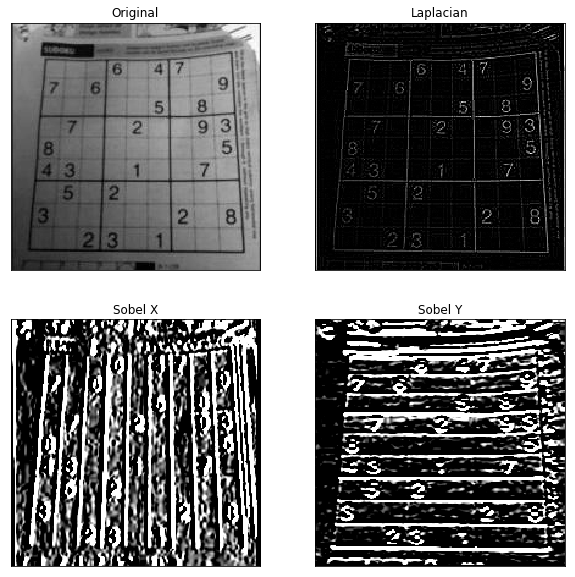

In [5]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('dave.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_8U )
sobelx = cv2.Sobel(img,cv2.CV_8U ,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_8U ,0,1,ksize=5)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

## 重要ポイント
上のコードでは出力画像の型を cv2.CV_8U もしくは np.uint8 としているが，実はちょっとした問題がある．黒から白への変化(画素値の低い値から高い値への変化)は正方向の傾きとして計算されるが，白から黒への変化(画素値の高い値から低い値への変化)は負の傾きとして計算される．そのため，勾配を np.uint8 へ変換すると，負の値は全て0になってしまう、つまり，負の勾配を失ってしまうという問題がある．

正負両方のエッジを検出したいのであれば，画素値の型を cv2.CV_16S や cv2.CV_64F といった、より高次のものに変更する．次のコードは横方向のSobelフィルタを例に，画素値の型の違いが結果に及ぼす影響を示す (<A HREF="http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/simpleBox.png">対象画像</A>)．

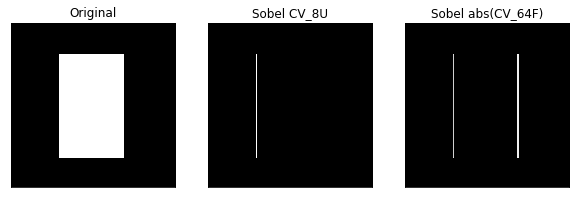

In [35]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('simpleBox.png',0)

# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.figure(figsize=(10,4))
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

plt.show()

## 参考
* [白井のコンピュータビジョンの個人メモ:エッジ検出](http://lang.sist.chukyo-u.ac.jp/Classes/ComputerVision/EdgeDetector.html)

## 目次
* [最初に戻る]( http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/usingOpenCV.html )
* 一つ上: OpenCVを使った画像処理<BR>
OpenCVが提供する様々な画像処理の関数について学ぶ
* 前の学習項目 [モルフォロジー変換 morphologicalOps.ipynb ](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/morphologicalOps.html )<BR>
モルフォロジー変換(膨張，収縮処理など)を学ぶ．
* 次の学習項目 [Canny法によるエッジ検出 canny.ipynb](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/canny.html)<BR>
Cannyのエッジ検出を学ぶ．